# Data Visualization and Analysis
### Notebook Input
* JSON file of 200 President Trump's coronavirus-related tweets, along with VADER and IBM Watson Tone Analyzer metadata 
* JSON file of 200 President Trump's non-coronavirus-related tweets, along with VADER and IBM Watson Tone Analyzer metadata
* JSON file containing **corpus** of 200 President Trump's coronavirus-related tweets, along with VADER and IBM Watson Tone Analyzer metadata
* JSON file containing **corpus** of 200 President Trump's non-coronavirus-related tweets, along with VADER and IBM Watson Tone Analyzer metadata

### Notebook Output
* This notebook generates no new files. All Data visualization and analysis is done directly in this notebook

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import nltk
import numpy as np

## Create dictionaries from JSON File

In [2]:
coronavirus_tweets     = []
non_coronavirus_tweets = []
corpus_tweets          = []


with open('coronavirus_tweets_with_tone_and_sentiment.json', encoding="utf8") as f:
  coronavirus_tweets = json.load(f)

with open('non_coronavirus_tweets_with_tone_and_sentiment.json', encoding="utf8") as f:
  non_coronavirus_tweets = json.load(f)

with open('corpus_coronavirus_tweets_with_tone_and_sentiment.json', encoding="utf8") as f:
  temp_corpus_coronavirus_tweets = json.load(f)
  temp_corpus_coronavirus_tweets['description'] = 'Corpus Coronavirus Tweets'

with open('corpus_non_coronavirus_tweets_with_tone_and_sentiment.json', encoding="utf8") as f:
  temp_corpus_non_coronavirus_tweets = json.load(f)
  temp_corpus_non_coronavirus_tweets['description'] = 'Corpus Non-Coronavirus Tweets'

corpus_tweets.append(temp_corpus_coronavirus_tweets)
corpus_tweets.append(temp_corpus_non_coronavirus_tweets)

print(f'Coronavirus tweets count: {len(coronavirus_tweets)}')
print(f'Non-Coronavirus tweets count: {len(non_coronavirus_tweets)}')
print(f'Corpus count: {len(corpus_tweets)}')

Coronavirus tweets count: 200
Non-Coronavirus tweets count: 200
Corpus count: 2


## Dataframe Setup

### The non-corpus Dataframes include the following columns:

| Column Name        | Column Description   |
| -------------      |---------------|
| **id_str**         | the tweet's id on twitter |
| **created_at**     | the tweet's timestamp on twitter                                                            |
| **text**           | the tweet text                                                                              |
| **anger**          | IBM Watson Ton Analyzer score for anger, (placeholder value 0.0 if score was below .5)      |
| **analytical**     | IBM Watson Ton Analyzer score for analytical, (placeholder value 0.0 if score was below .5) |
| **confident**      | IBM Watson Ton Analyzer score for confident, (placeholder value 0.0 if score was below .5)  |
| **fear**           | IBM Watson Ton Analyzer score for fear, (placeholder value 0.0 if score was below .5)       |
| **joy**            | IBM Watson Ton Analyzer score for joy, (placeholder value 0.0 if score was below .5)        |
| **sadness**        | IBM Watson Ton Analyzer score for sadness, (placeholder value 0.0 if score was below .5)    |
| **tentative**      | IBM Watson Ton Analyzer score for tentative, (placeholder value 0.0 if score was below .5)  |
| **vader_polarity** | Ranges from -1 - 1, where -1 is negative sentiment and 1 is positive sentiment              |

### The corpus Dataframe includes the following columns:

| Column Name        | Column Description   |
| -------------      |---------------|
| **text**           | the tweet text                                                                              |
| **vader_polarity** | Ranges from -1 - 1, where -1 is negative sentiment and 1 is positive sentiment              |
| **analytical**     | IBM Watson Ton Analyzer score for analytical, (placeholder value 0.0 if score was below .5) |
| **anger**          | IBM Watson Ton Analyzer score for anger, (placeholder value 0.0 if score was below .5)      |
| **confident**      | IBM Watson Ton Analyzer score for confident, (placeholder value 0.0 if score was below .5)  |
| **fear**           | IBM Watson Ton Analyzer score for fear, (placeholder value 0.0 if score was below .5)       |
| **joy**            | IBM Watson Ton Analyzer score for joy, (placeholder value 0.0 if score was below .5)        |
| **sadness**        | IBM Watson Ton Analyzer score for sadness, (placeholder value 0.0 if score was below .5)    |
| **tentative**      | IBM Watson Ton Analyzer score for tentative, (placeholder value 0.0 if score was below .5)  |
| **description**    | Label: `Corpus Coronavirus Tweets` or `Corpus Non-Coronavirus Tweets`                       |

In [3]:
# Create Non-corpus dataframes
pd.set_option('max_colwidth', 300)
coronavirus_tweets_df     = pd.DataFrame.from_dict(coronavirus_tweets)
non_coronavirus_tweets_df = pd.DataFrame.from_dict(non_coronavirus_tweets)

# Create corpus dataframes
corpus_tweets_df = pd.DataFrame.from_dict(corpus_tweets)

## Scatterplots - Vader And IBM Watson Tone Analyzer

In [4]:
# Setup coronavirus-related dataframes by Tone

# anger
anger_coronavirus_df = coronavirus_tweets_df.copy()
anger_coronavirus_df = anger_coronavirus_df[anger_coronavirus_df.anger != 0.0]

# analytical
analytical_coronavirus_df = coronavirus_tweets_df.copy()
analytical_coronavirus_df = analytical_coronavirus_df[analytical_coronavirus_df.analytical != 0.0]

# confident
confident_coronavirus_df = coronavirus_tweets_df.copy()
confident_coronavirus_df = confident_coronavirus_df[confident_coronavirus_df.confident != 0.0]

# fear
fear_coronavirus_df = coronavirus_tweets_df.copy()
fear_coronavirus_df = fear_coronavirus_df[fear_coronavirus_df.fear != 0.0]

# joy
joy_coronavirus_df = coronavirus_tweets_df.copy()
joy_coronavirus_df = joy_coronavirus_df[joy_coronavirus_df.joy != 0.0]

# sadness
sadness_coronavirus_df = coronavirus_tweets_df.copy()
sadness_coronavirus_df = sadness_coronavirus_df[sadness_coronavirus_df.sadness != 0.0]

# tentative
tentative_coronavirus_df = coronavirus_tweets_df.copy()
tentative_coronavirus_df = tentative_coronavirus_df[tentative_coronavirus_df.tentative != 0.0]


In [5]:
# Setup non-coronavirus-related dataframes by Tone

# anger
anger_non_coronavirus_df = non_coronavirus_tweets_df.copy()
anger_non_coronavirus_df = anger_non_coronavirus_df[anger_non_coronavirus_df.anger != 0.0]

# analytical
analytical_non_coronavirus_df = non_coronavirus_tweets_df.copy()
analytical_non_coronavirus_df = analytical_non_coronavirus_df[analytical_non_coronavirus_df.analytical != 0.0]

# confident
confident_non_coronavirus_df = non_coronavirus_tweets_df.copy()
confident_non_coronavirus_df = confident_non_coronavirus_df[confident_non_coronavirus_df.confident != 0.0]

# fear
fear_non_coronavirus_df = non_coronavirus_tweets_df.copy()
fear_non_coronavirus_df = fear_non_coronavirus_df[fear_non_coronavirus_df.fear != 0.0]

# joy
joy_non_coronavirus_df = non_coronavirus_tweets_df.copy()
joy_non_coronavirus_df = joy_non_coronavirus_df[joy_non_coronavirus_df.joy != 0.0]

# sadness
sadness_non_coronavirus_df = non_coronavirus_tweets_df.copy()
sadness_non_coronavirus_df = sadness_non_coronavirus_df[sadness_non_coronavirus_df.sadness != 0.0]

# tentative
tentative_non_coronavirus_df = non_coronavirus_tweets_df.copy()
tentative_non_coronavirus_df = tentative_non_coronavirus_df[tentative_non_coronavirus_df.tentative != 0.0]


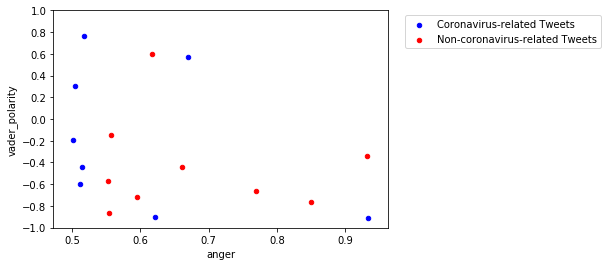

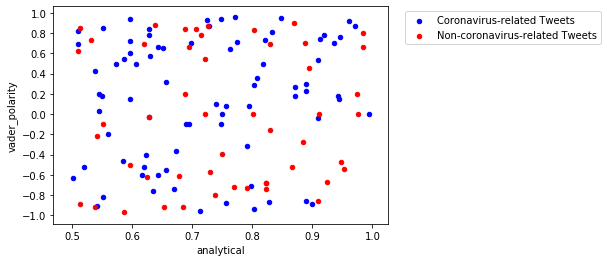

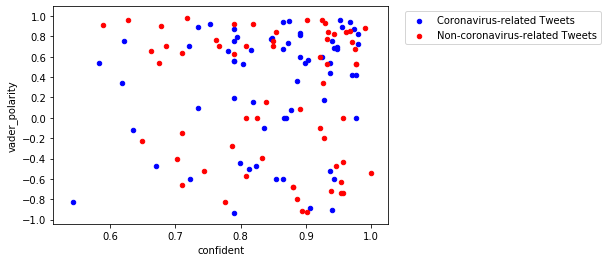

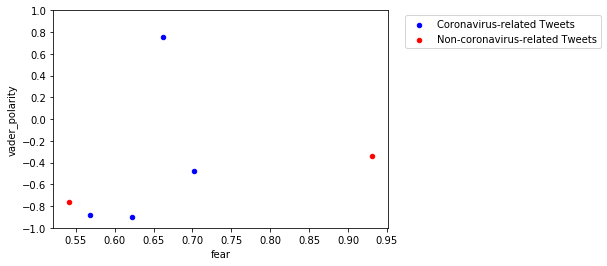

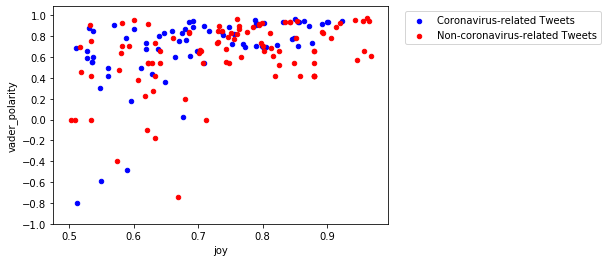

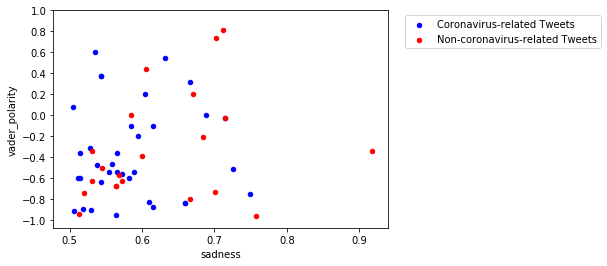

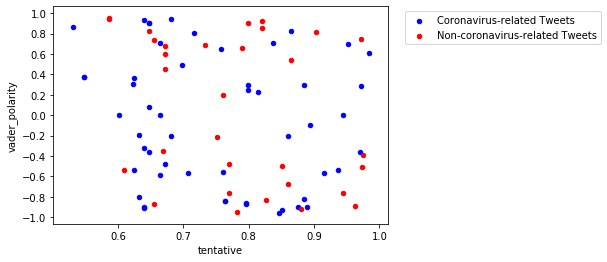

In [6]:
# Create and Display the scatterplots

fig, ax = plt.subplots()
anger_coronavirus_df.plot.scatter(label='Coronavirus-related Tweets',ax=ax, x='anger',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
anger_non_coronavirus_df.plot.scatter(label='Non-coronavirus-related Tweets', ax=ax, x='anger',y='vader_polarity',color='red', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
ax.legend(bbox_to_anchor=(1.65, 1.00))
plt.show()


fig, ax = plt.subplots()
analytical_coronavirus_df.plot.scatter(label='Coronavirus-related Tweets',ax=ax, x='analytical',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
analytical_non_coronavirus_df.plot.scatter(label='Non-coronavirus-related Tweets', ax=ax, x='analytical',y='vader_polarity',color='red', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
ax.legend(bbox_to_anchor=(1.65, 1.00))
plt.show()

fig, ax = plt.subplots()
confident_coronavirus_df.plot.scatter(label='Coronavirus-related Tweets',ax=ax, x='confident',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
confident_non_coronavirus_df.plot.scatter(label='Non-coronavirus-related Tweets', ax=ax, x='confident',y='vader_polarity',color='red', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
ax.legend(bbox_to_anchor=(1.65, 1.00))
plt.show()

fig, ax = plt.subplots()
fear_coronavirus_df.plot.scatter(label='Coronavirus-related Tweets',ax=ax, x='fear',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
fear_non_coronavirus_df.plot.scatter(label='Non-coronavirus-related Tweets', ax=ax, x='fear',y='vader_polarity',color='red', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
ax.legend(bbox_to_anchor=(1.65, 1.00))
plt.show()

fig, ax = plt.subplots()
joy_coronavirus_df.plot.scatter(label='Coronavirus-related Tweets',ax=ax, x='joy',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
joy_non_coronavirus_df.plot.scatter(label='Non-coronavirus-related Tweets', ax=ax, x='joy',y='vader_polarity',color='red', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
ax.legend(bbox_to_anchor=(1.65, 1.00))
plt.show()

fig, ax = plt.subplots()
sadness_coronavirus_df.plot.scatter(label='Coronavirus-related Tweets',ax=ax, x='sadness',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
sadness_non_coronavirus_df.plot.scatter(label='Non-coronavirus-related Tweets', ax=ax, x='sadness',y='vader_polarity',color='red', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
ax.legend(bbox_to_anchor=(1.65, 1.00))
plt.show()

fig, ax = plt.subplots()
tentative_coronavirus_df.plot.scatter(label='Coronavirus-related Tweets',ax=ax, x='tentative',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
tentative_non_coronavirus_df.plot.scatter(label='Non-coronavirus-related Tweets', ax=ax, x='tentative',y='vader_polarity',color='red', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
ax.legend(bbox_to_anchor=(1.65, 1.00))
plt.show()


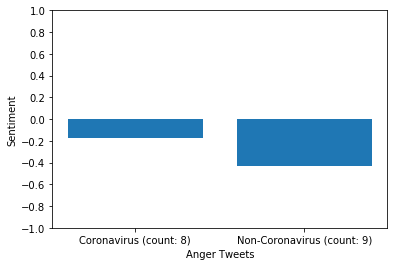

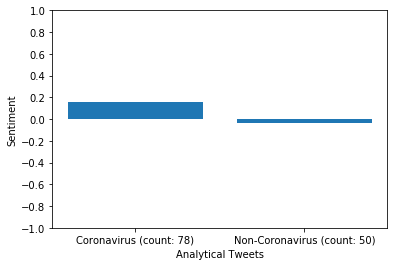

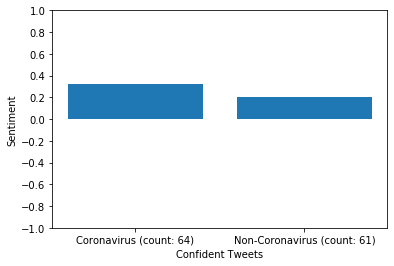

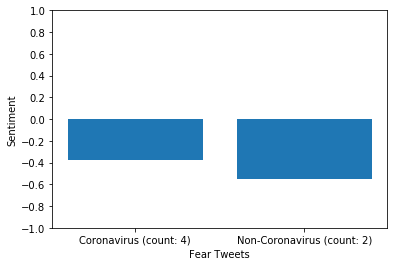

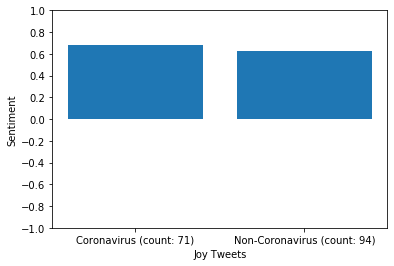

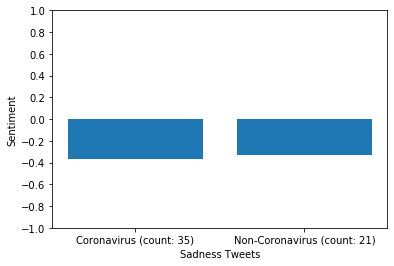

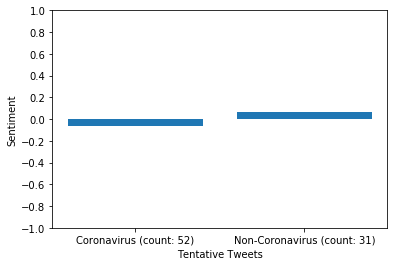

In [7]:
x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [anger_coronavirus_df['vader_polarity'].mean(), anger_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_anger_label = f'Coronavirus (count: {len(anger_coronavirus_df)})'
non_coronavirus_anger_label = f'Non-Coronavirus (count: {len(anger_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_anger_label, non_coronavirus_anger_label))
plt.yticks([-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylabel('Sentiment')
plt.xlabel('Anger Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [analytical_coronavirus_df['vader_polarity'].mean(), analytical_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_analytical_label = f'Coronavirus (count: {len(analytical_coronavirus_df)})'
non_coronavirus_analytical_label = f'Non-Coronavirus (count: {len(analytical_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_analytical_label, non_coronavirus_analytical_label))
plt.yticks([-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylabel('Sentiment')
plt.xlabel('Analytical Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [confident_coronavirus_df['vader_polarity'].mean(), confident_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_confident_label = f'Coronavirus (count: {len(confident_coronavirus_df)})'
non_coronavirus_confident_label = f'Non-Coronavirus (count: {len(confident_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_confident_label, non_coronavirus_confident_label))
plt.yticks([-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylabel('Sentiment')
plt.xlabel('Confident Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [fear_coronavirus_df['vader_polarity'].mean(), fear_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_fear_label = f'Coronavirus (count: {len(fear_coronavirus_df)})'
non_coronavirus_fear_label = f'Non-Coronavirus (count: {len(fear_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_fear_label, non_coronavirus_fear_label))
plt.yticks([-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylabel('Sentiment')
plt.xlabel('Fear Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [joy_coronavirus_df['vader_polarity'].mean(), joy_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_joy_label = f'Coronavirus (count: {len(joy_coronavirus_df)})'
non_coronavirus_joy_label = f'Non-Coronavirus (count: {len(joy_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_joy_label, non_coronavirus_joy_label))
plt.yticks([-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylabel('Sentiment')
plt.xlabel('Joy Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [sadness_coronavirus_df['vader_polarity'].mean(), sadness_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_sadness_label = f'Coronavirus (count: {len(sadness_coronavirus_df)})'
non_coronavirus_sadness_label = f'Non-Coronavirus (count: {len(sadness_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_sadness_label, non_coronavirus_sadness_label))
plt.yticks([-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylabel('Sentiment')
plt.xlabel('Sadness Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [tentative_coronavirus_df['vader_polarity'].mean(), tentative_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_tentative_label = f'Coronavirus (count: {len(tentative_coronavirus_df)})'
non_coronavirus_tentative_label = f'Non-Coronavirus (count: {len(tentative_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_tentative_label, non_coronavirus_tentative_label))
plt.yticks([-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylabel('Sentiment')
plt.xlabel('Tentative Tweets')
plt.show()

## Corpus Coronavirus Tweets

In [8]:
corpus_tweets_df

,text,vader_polarity,analytical,anger,confident,fear,joy,sadness,tentative,description
0,"China has been working very hard to contain the Coronavirus. The United States greatly appreciates their efforts and transparency. It will all work out well. In particular, on behalf of the American People, I want to thank President Xi! We are in very close communication with China concerning t...",0.9999,0.0,0.0,0.0,0.0,0.600239,0.514898,0.0,Corpus Coronavirus Tweets
1,"Wonderful account of U.S. Embassy (Iraq) vs. the Benghazi disaster! https://t.co/qDQtgkjr1S General Qassem Soleimani has killed or badly wounded thousands of Americans over an extended period of time, and was plotting to kill many more...but got caught! He was directly and indirectly responsibl...",1.0000,0.0,0.0,0.0,0.0,0.606194,0.514669,0.0,Corpus Non-Coronavirus Tweets


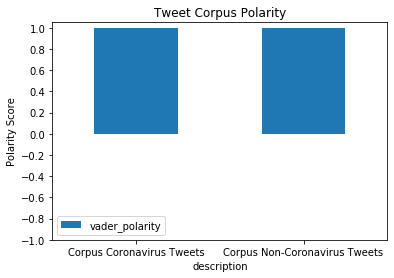

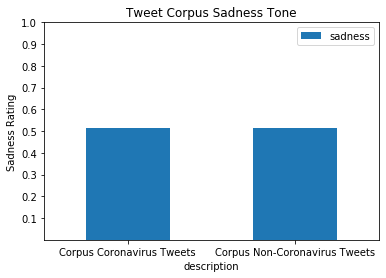

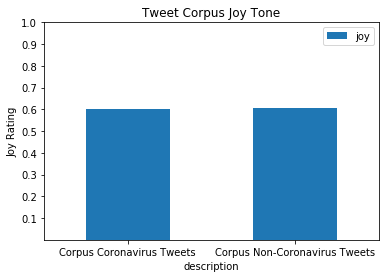

In [9]:
corpus_tweets_df.plot(kind='bar',x='description',y='vader_polarity',title='Tweet Corpus Polarity', rot=0)
plt.ylabel("Polarity Score")
plt.yticks([-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

corpus_tweets_df.plot(kind='bar',x='description',y='sadness',title='Tweet Corpus Sadness Tone', rot=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel("Sadness Rating")
plt.show()

corpus_tweets_df.plot(kind='bar',x='description',y='joy',title='Tweet Corpus Joy Tone', rot=0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel("Joy Rating")
plt.show()

## Summary

This analysis was to determine if there were tone or sentiment differences between Trump's coronavirus-related tweets and non-coronavirus related tweets. Here are my observations:
* The tones most depicated in both coronavirus-related and non-coronavirus-related tweets is Joy and Sadness.
* There is no difference in tone or sentiment between coronavirus-related and non-coronavirus-related tweets. In other words: there is no significant change in Trump's rhetoric when addressing coronavirus in his tweets compared to other topics. 
* When the tone of the tweet is anger, there is slightly less negative sentiment for coronavirus-related tweets compared to non-coronavirus-related tweets
* When the tone of the tweete is analytical there is slightly more positive sentiment for coronavirus-related tweets compared to non-coronavirus-related tweets
* When the tone of the tweet is confident, there is slightly more postive sentiment for coronavirus-related tweets compared to non-coronavirus-related tweets
* The difference of tone for fear related tweets should be examined with caution due to how few tweets were flagged as depicting this tone.